## Test dataset

#### Load libraries

In [1]:
import numpy as np 
import pandas as pd 
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

### 1.Data import and aggregation

In [2]:
# Data Aggregation
airstore = pd.read_csv('air_store_info.csv')
dates = pd.read_csv('date_info.csv')
wd = pd.read_csv('WeatherData.csv')
test = pd.read_csv('sample_submission.csv')
airres = pd.read_csv ('airres.csv')

In [3]:
test.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32019 entries, 0 to 32018
Data columns (total 2 columns):
id          32019 non-null object
visitors    32019 non-null int64
dtypes: int64(1), object(1)
memory usage: 500.4+ KB


  ### 1.1.Convert the date format 

In [5]:
test['visit_date'] = test['id'].map(lambda x: str(x).split('_')[2])
test['air_store_id'] = test['id'].map(lambda x: '_'.join(x.split('_')[:2]))

test.head(4)

,id,visitors,visit_date,air_store_id
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9


In [6]:
len(test.air_store_id.unique())

821

In [7]:
test['visit_date'] = pd.to_datetime(test['visit_date'])
test['dw'] = test['visit_date'].dt.dayofweek
test['dy'] = test['visit_date'].dt.year
test['date'] = test['visit_date'].dt.day
test['month'] = test['visit_date'].dt.month
test['visit_date'] = test['visit_date'].dt.date

test.head(4)

,id,visitors,visit_date,air_store_id,dw,dy,date,month
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,23,4
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,24,4
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,25,4
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,26,4


In [8]:
dates.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [9]:
dates['visit_date'] = dates['calendar_date']

In [10]:
dates['visit_date'] = pd.to_datetime(dates['visit_date'])
test['visit_date'] = pd.to_datetime(test['visit_date'])
dates.head()

,calendar_date,day_of_week,holiday_flg,visit_date
0,2016-01-01,Friday,1,2016-01-01
1,2016-01-02,Saturday,1,2016-01-02
2,2016-01-03,Sunday,1,2016-01-03
3,2016-01-04,Monday,0,2016-01-04
4,2016-01-05,Tuesday,0,2016-01-05


In [11]:
test = pd.merge(test,dates, how='left', on=['visit_date'])
test.head()

,id,visitors,visit_date,air_store_id,dw,dy,date,month,calendar_date,day_of_week,holiday_flg
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,23,4,2017-04-23,Sunday,0
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,24,4,2017-04-24,Monday,0
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,25,4,2017-04-25,Tuesday,0
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,26,4,2017-04-26,Wednesday,0
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,27,4,2017-04-27,Thursday,0


In [12]:
test.visit_date.min()

Timestamp('2017-04-23 00:00:00')

In [13]:
test.visit_date.max()

Timestamp('2017-05-31 00:00:00')

In [14]:
test.drop(['calendar_date'], axis=1, inplace=True)

### 1.3. AIR and HPG  reserve data aggregation

In [15]:
#AIR reserve

In [16]:
airres.head()

,Unnamed: 0,air_store_id,visit_date,reserve_visitors_air,air_date_diff
0,0,air_00a91d42b08b08d9,2016-10-31,2,0.0
1,1,air_00a91d42b08b08d9,2016-12-05,9,4.0
2,2,air_00a91d42b08b08d9,2016-12-14,18,6.0
3,3,air_00a91d42b08b08d9,2016-12-17,2,6.0
4,4,air_00a91d42b08b08d9,2016-12-20,4,2.0


In [17]:
airres['reserve_visitors_air_1'] = airres['reserve_visitors_air']
airres['air_date_diff_1'] = airres['air_date_diff']

In [18]:
airres = airres.drop(['air_date_diff','reserve_visitors_air'], axis=1)

In [19]:
airres.visit_date = pd.to_datetime(airres.visit_date)

In [20]:
airtest = pd.merge(test,airres,how='left',on=['air_store_id','visit_date',])

In [22]:
airres.head()

,Unnamed: 0,air_store_id,visit_date,reserve_visitors_air_1,air_date_diff_1
0,0,air_00a91d42b08b08d9,2016-10-31,2,0.0
1,1,air_00a91d42b08b08d9,2016-12-05,9,4.0
2,2,air_00a91d42b08b08d9,2016-12-14,18,6.0
3,3,air_00a91d42b08b08d9,2016-12-17,2,6.0
4,4,air_00a91d42b08b08d9,2016-12-20,4,2.0


In [21]:
test.head()

,id,visitors,visit_date,air_store_id,dw,dy,date,month,day_of_week,holiday_flg
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,23,4,Sunday,0
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,24,4,Monday,0
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,25,4,Tuesday,0
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,26,4,Wednesday,0
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,27,4,Thursday,0


In [23]:
airtest.head()

,id,visitors,visit_date,air_store_id,dw,dy,date,month,day_of_week,holiday_flg,Unnamed: 0,reserve_visitors_air_1,air_date_diff_1
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,23,4,Sunday,0,NaN,NaN,NaN
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,24,4,Monday,0,NaN,NaN,NaN
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,25,4,Tuesday,0,NaN,NaN,NaN
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,26,4,Wednesday,0,NaN,NaN,NaN
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,27,4,Thursday,0,NaN,NaN,NaN


In [25]:
airtest = airtest.drop(['Unnamed: 0'], axis=1)

In [32]:
test = pd.merge(airtest,airstore,on='air_store_id')
test.head(2)

,id,visitors,visit_date,air_store_id,dw,dy,date,month,day_of_week,holiday_flg,reserve_visitors_air_1,air_date_diff_1,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,23,4,Sunday,0,NaN,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,24,4,Monday,0,NaN,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595


### 2.Geography clustering

Apparently Japan's terittory is divided in 8 regions which are not official administrative units, but have been traditionally used as the regional division of Japan in a number of contexts [https://en.wikipedia.org/wiki/List_of_regions_of_Japan ]

From north to south, the traditional regions are:
* **Hokkaidō** (the island of Hokkaidō and nearby islands, population: 5,507,456, largest city: Sapporo)
* **Tōhoku** region (northern Honshū, population: 9,335,088, largest city: Sendai)
* **Kantō** region (eastern Honshū, population: 42,607,376, largest city: Tokyo)
* **Chūbu region** (central Honshū, including Mt. Fuji, population: 21,714,995, largest city: Nagoya), sometimes divided into:
   * Hokuriku region (northwestern Chūbu, largest city: Kanazawa)
   * Kōshin'etsu region (northeastern Chūbu, largest city: Niigata)
  * Tōkai region (southern Chūbu, largest city: Nagoya)
* **Kansai or Kinki** region (west-central Honshū, including the old capital, Kyoto, population: 22,755,030, largest city: Osaka)
* **Chūgoku** region (western Honshū, population: 7,561,899, largest city: Hiroshima)
* **Shikoku** (island, population: 3,977,205, largest city: Matsuyama)
* **Kyūshū** (island, population: 14,596,977, largest city: Fukuoka) which includes:
  * Northern Kyushu: Fukuoka, Saga, Nagasaki and Ōita (largest city: Fukuoka)
  * Southern Kyushu: Kumamoto, Miyazaki and Kagoshima (largest city: Kagoshima)
  * Okinawa (largest city: Naha)

In [33]:
#we do cluster analysis by geographic position(Longitude,Latitude)
#the number of classes is equal to 9 because in Japan there are 9 areas(n_clusters=8)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(test[['longitude','latitude']])
test['cluster'] = kmeans.predict(test[['longitude','latitude']])

In [34]:
test.head()

,id,visitors,visit_date,air_store_id,dw,dy,date,month,day_of_week,holiday_flg,reserve_visitors_air_1,air_date_diff_1,air_genre_name,air_area_name,latitude,longitude,cluster
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,23,4,Sunday,0,NaN,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,24,4,Monday,0,NaN,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,25,4,Tuesday,0,NaN,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,26,4,Wednesday,0,NaN,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,27,4,Thursday,0,NaN,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0


In [35]:
#we import the library "Basemap" from mpl_toolkits.basemap and projection to create a map
import os
os.environ["PROJ_LIB"] = "C:\\Users\\sergey\\Anaconda3\\Library\\share";
from mpl_toolkits.basemap import Basemap

In [36]:
m = Basemap(projection='aeqd',width=2000000,height=2000000, lat_0=37.5, lon_0=138.2)

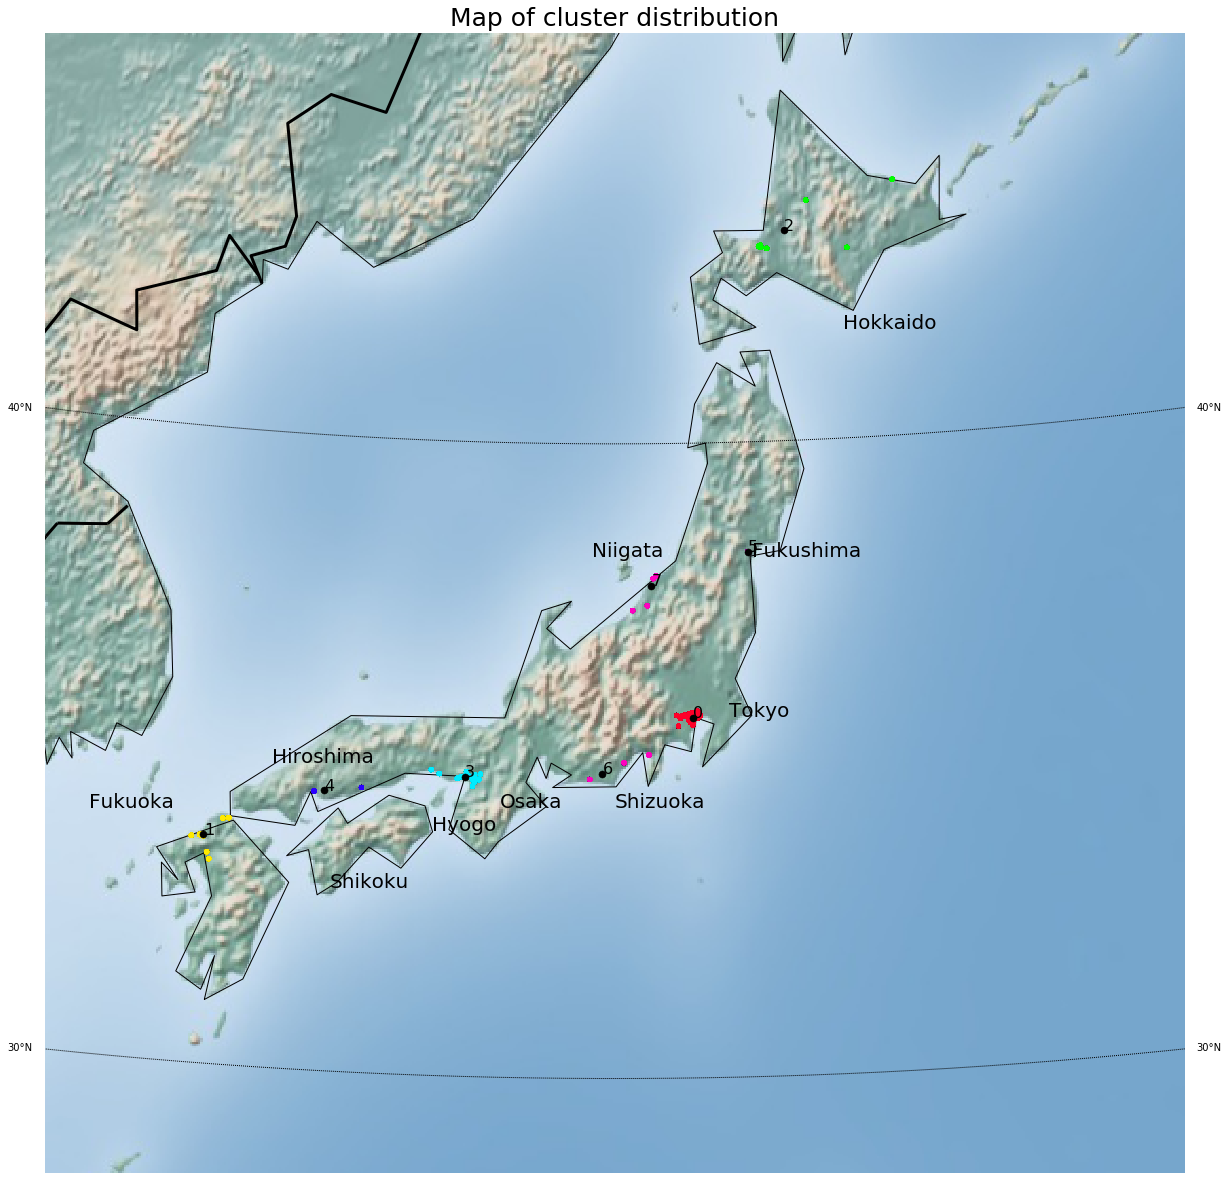

In [37]:
cx = [c[0] for c in kmeans.cluster_centers_]
cy = [c[1] for c in kmeans.cluster_centers_]
cm = plt.get_cmap('gist_rainbow')

colors = [cm(2.*i/10) for i in range(10)]
colored = [colors[k] for k in test['cluster']]
f,axa = plt.subplots(1,1,figsize=(27,21))

m.shadedrelief()
#m.drawcoastlines()
#m.fillcontinents(color='lightyellow',lake_color='aqua',zorder=1)
m.drawcoastlines()
m.drawcountries(linewidth = 3)
m.drawstates(color='0.3')
parallels = np.arange(0.,360,10.,)
m.drawparallels(parallels, labels = [True for s in range(len(parallels))])
meridians = np.arange(0.,360,10.,)

m.scatter(test.longitude.values,test.latitude.values,color=colored,s=20,alpha=1,zorder=999,latlon=True)
#m.scatter(df_full.longitude.values,df_full.latitude.values,color=colored,s=20,alpha=1,zorder=999,latlon=True)
m.scatter(cx,cy,color='Black',s=50,alpha=1,latlon=True,zorder=999)
plt.setp(axa.get_yticklabels(), visible=True)
plt.annotate('Fukuoka', xy=(0.04, 0.32), xycoords='axes fraction',fontsize=20)
plt.annotate('Shikoku', xy=(0.25, 0.25), xycoords='axes fraction',fontsize=20)
plt.annotate('Hiroshima', xy=(0.2, 0.36), xycoords='axes fraction',fontsize=20)
plt.annotate('Osaka', xy=(0.40, 0.32), xycoords='axes fraction',fontsize=20)
plt.annotate('Tokyo', xy=(0.60, 0.4), xycoords='axes fraction',fontsize=20)
plt.annotate('Shizuoka', xy=(0.50, 0.32), xycoords='axes fraction',fontsize=20)
plt.annotate('Niigata', xy=(0.48, 0.54), xycoords='axes fraction',fontsize=20)
plt.annotate('Fukushima', xy=(0.62, 0.54), xycoords='axes fraction',fontsize=20)
plt.annotate('Hokkaido', xy=(0.7, 0.74), xycoords='axes fraction',fontsize=20)
plt.annotate('Hyogo', xy=(0.34, 0.30), xycoords='axes fraction',fontsize=20)

for i in range(len(cx)):
    xpt,ypt = m(cx[i],cy[i])
    plt.annotate(i, (xpt+500,ypt+500),zorder=99999,fontsize=16)
    plt.title("Map of cluster distribution",fontsize=25)
plt.show()

On the map we can see by the color of the points that the classes are rightly spread out and distributed around the black points.<br>
Now we check which class number is equal to which region.

In [38]:
#separate the first part of the name of the region
test['prefecture'] = test['air_area_name'].map(lambda x: str(x).split(' ')[0])
test.head(1)

,id,visitors,visit_date,air_store_id,dw,dy,date,month,day_of_week,holiday_flg,reserve_visitors_air_1,air_date_diff_1,air_genre_name,air_area_name,latitude,longitude,cluster,prefecture
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,23,4,Sunday,0,NaN,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0,Tōkyō-to


In [39]:
testcluster = test.groupby(['prefecture','cluster'], as_index=False)['air_store_id'].count()
#testcluster['percent'] = aircluster.air_store_id/aircluster.air_store_id.sum()*100
testcluster.head(10)
#we calculate what percentage of all restaurants are in each region

,prefecture,cluster,air_store_id
0,Fukuoka-ken,1,4875
1,Hiroshima-ken,4,1248
2,Hokkaidō,2,1716
3,Hyōgo-ken,3,2223
4,Miyagi-ken,5,663
5,Niigata-ken,7,546
6,Shizuoka-ken,6,702
7,Tōkyō-to,0,17160
8,Ōsaka-fu,3,2886


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32019 entries, 0 to 32018
Data columns (total 18 columns):
id                        32019 non-null object
visitors                  32019 non-null int64
visit_date                32019 non-null datetime64[ns]
air_store_id              32019 non-null object
dw                        32019 non-null int64
dy                        32019 non-null int64
date                      32019 non-null int64
month                     32019 non-null int64
day_of_week               32019 non-null object
holiday_flg               32019 non-null int64
reserve_visitors_air_1    1131 non-null float64
air_date_diff_1           1131 non-null float64
air_genre_name            32019 non-null object
air_area_name             32019 non-null object
latitude                  32019 non-null float64
longitude                 32019 non-null float64
cluster                   32019 non-null int32
prefecture                32019 non-null object
dtypes: datetime64[ns](1

Let's try to relate the identified groups with the biggest cities:

* Cluster 0 refers to Tōkyō-to.
* Cluster 1 refers  to Fukuoka-ken
* Cluster 2 refers to Hokkaidō
* Cluster 3 refers to Hyōgo-ken
* Cluster 4 refers to Hiroshima-ken
* Cluster 5 referst to Miyagi-ken
* Cluster 6 refers to Shizuoka-ken
* Cluster 7 refers to Niigata-ken

## 4. Japanese Holidays and date conversion

In [41]:
#we assign indexes for holiday, sunday, saturday.
test['sunday'] = test['visit_date'].dt.dayofweek.apply(lambda x:1 if x==6 else 0)
test['saturday'] = test['visit_date'].dt.dayofweek.apply(lambda x:1 if x==5 else 0)
test['sat/sun/hol']=test['holiday_flg']*1+test['sunday']*0.5+test['saturday']*0.3
#tet2017 = test[test['visit_date'].dt.year==2017]
test.head()

,id,visitors,visit_date,air_store_id,dw,dy,date,month,day_of_week,holiday_flg,...,air_date_diff_1,air_genre_name,air_area_name,latitude,longitude,cluster,prefecture,sunday,saturday,sat/sun/hol
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,23,4,Sunday,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0,Tōkyō-to,1,0,0.5
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,24,4,Monday,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0,Tōkyō-to,0,0,0.0
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,25,4,Tuesday,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0,Tōkyō-to,0,0,0.0
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,26,4,Wednesday,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0,Tōkyō-to,0,0,0.0
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,27,4,Thursday,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0,Tōkyō-to,0,0,0.0


## 5. Weather Data

In [42]:
wd.head()

,area_name,calendar_date,precipitation,avg_temperature,total_snowfall,deepest_snowfall,hours_sunlight,avg_wind_speed,avg_vapor_pressure,avg_humidity,avg_sea_pressure,avg_local_pressure,solar_radiation,cloud_cover,high_temperature,low_temperature
0,fukuoka_dazaifu-kana_dasaif,1/1/16,0.0,5.7,NaN,NaN,5.1,1.9,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.1
1,fukuoka_dazaifu-kana_dasaif,1/2/16,0.5,10.2,NaN,NaN,1.3,2.2,NaN,NaN,NaN,NaN,NaN,NaN,15.3,6.1
2,fukuoka_dazaifu-kana_dasaif,1/3/16,0.0,11.2,NaN,NaN,0.5,0.9,NaN,NaN,NaN,NaN,NaN,NaN,15.5,7.1
3,fukuoka_dazaifu-kana_dasaif,1/4/16,0.0,9.4,NaN,NaN,4.2,1.8,NaN,NaN,NaN,NaN,NaN,NaN,16.1,5.9
4,fukuoka_dazaifu-kana_dasaif,1/5/16,1.5,8.8,NaN,NaN,0.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,12.3,7.1


In [43]:
#separate the first part of the name of the region
wd['prefecture'] = wd['area_name'].map(lambda x: str(x).split('_')[0])
wd.head(3)

,area_name,calendar_date,precipitation,avg_temperature,total_snowfall,deepest_snowfall,hours_sunlight,avg_wind_speed,avg_vapor_pressure,avg_humidity,avg_sea_pressure,avg_local_pressure,solar_radiation,cloud_cover,high_temperature,low_temperature,prefecture
0,fukuoka_dazaifu-kana_dasaif,1/1/16,0.0,5.7,NaN,NaN,5.1,1.9,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.1,fukuoka
1,fukuoka_dazaifu-kana_dasaif,1/2/16,0.5,10.2,NaN,NaN,1.3,2.2,NaN,NaN,NaN,NaN,NaN,NaN,15.3,6.1,fukuoka
2,fukuoka_dazaifu-kana_dasaif,1/3/16,0.0,11.2,NaN,NaN,0.5,0.9,NaN,NaN,NaN,NaN,NaN,NaN,15.5,7.1,fukuoka


In [44]:
wdmytest = wd.groupby(['prefecture'], as_index=False)['avg_temperature'].mean()
wdmytest.head(10)

,prefecture,avg_temperature
0,fukuoka,15.728844
1,hiroshima,14.317344
2,hokkaido,5.872029
3,hyogo,14.592747
4,kanagawa,15.356673
5,miyagi,11.087105
6,niigata,12.433745
7,osaka,14.812773
8,saitama,13.533269
9,shizuoka,15.470068


Let's try to relate the identified groups with the biggest cities:

* Cluster 0 refers to Tōkyō-to.+
* Cluster 1 refers  to Fukuoka-ken+
* Cluster 2 refers to Hokkaidō+
* Cluster 3 refers to Hyōgo-ken+
* Cluster 4 refers to Hiroshima-ken+
* Cluster 5 referst to Miyagi-ken+
* Cluster 6 refers to Shizuoka-ken+
* Cluster 7 refers to Niigata-ken+

In [45]:
import re
def area2group(area):
    if re.match(r'tokyo.*',area) !=None:
        return 0
    if re.match(r'hyogo.*',area) !=None:
        return 3
    if re.match(r'hokkaido.*',area) !=None:
        return 2    
    if re.match(r'fukuoka.*',area) !=None:
        return 1
    if re.match(r'niigata.*',area) !=None:
        return 7
    if re.match(r'hiroshima.*',area) !=None:
        return 4
    if re.match(r'shizuoka.*',area) !=None:
        return 6
    if re.match(r'miyagi.*',area) !=None:
        return 5
    else:
        return -1

warea = [area2group(area) for area in wd.area_name]
wd['cluster'] = warea

In [46]:
wd['calendar_date'] = pd.to_datetime(wd.calendar_date).dt.date
wd.head()

,area_name,calendar_date,precipitation,avg_temperature,total_snowfall,deepest_snowfall,hours_sunlight,avg_wind_speed,avg_vapor_pressure,avg_humidity,avg_sea_pressure,avg_local_pressure,solar_radiation,cloud_cover,high_temperature,low_temperature,prefecture,cluster
0,fukuoka_dazaifu-kana_dasaif,2016-01-01,0.0,5.7,NaN,NaN,5.1,1.9,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.1,fukuoka,1
1,fukuoka_dazaifu-kana_dasaif,2016-01-02,0.5,10.2,NaN,NaN,1.3,2.2,NaN,NaN,NaN,NaN,NaN,NaN,15.3,6.1,fukuoka,1
2,fukuoka_dazaifu-kana_dasaif,2016-01-03,0.0,11.2,NaN,NaN,0.5,0.9,NaN,NaN,NaN,NaN,NaN,NaN,15.5,7.1,fukuoka,1
3,fukuoka_dazaifu-kana_dasaif,2016-01-04,0.0,9.4,NaN,NaN,4.2,1.8,NaN,NaN,NaN,NaN,NaN,NaN,16.1,5.9,fukuoka,1
4,fukuoka_dazaifu-kana_dasaif,2016-01-05,1.5,8.8,NaN,NaN,0.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,12.3,7.1,fukuoka,1


In [47]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33088 entries, 0 to 33087
Data columns (total 18 columns):
area_name             33088 non-null object
calendar_date         33088 non-null object
precipitation         29465 non-null float64
avg_temperature       28936 non-null float64
total_snowfall        4177 non-null float64
deepest_snowfall      4684 non-null float64
hours_sunlight        25823 non-null float64
avg_wind_speed        28843 non-null float64
avg_vapor_pressure    9806 non-null float64
avg_humidity          9806 non-null float64
avg_sea_pressure      9823 non-null float64
avg_local_pressure    9823 non-null float64
solar_radiation       6204 non-null float64
cloud_cover           7238 non-null float64
high_temperature      28936 non-null float64
low_temperature       28936 non-null float64
prefecture            33088 non-null object
cluster               33088 non-null int64
dtypes: float64(14), int64(1), object(3)
memory usage: 4.5+ MB


In [48]:
wdg = wd.groupby(['cluster','calendar_date'],as_index=False).mean()
wdg.head()

,cluster,calendar_date,precipitation,avg_temperature,total_snowfall,deepest_snowfall,hours_sunlight,avg_wind_speed,avg_vapor_pressure,avg_humidity,avg_sea_pressure,avg_local_pressure,solar_radiation,cloud_cover,high_temperature,low_temperature
0,-1,2016-01-01,0.0,6.36,NaN,NaN,8.4125,2.09,5.966667,55.333333,1028.500000,1022.500000,11.215,2.833333,11.13,2.35
1,-1,2016-01-02,0.0,7.46,NaN,NaN,5.6250,1.78,7.366667,62.666667,1024.100000,1018.166667,7.080,6.433333,13.02,2.44
2,-1,2016-01-03,0.0,9.84,NaN,NaN,6.0125,1.52,9.533333,71.000000,1018.500000,1012.600000,8.080,6.266667,15.52,5.91
3,-1,2016-01-04,0.0,10.08,NaN,NaN,6.7250,2.06,9.033333,66.333333,1017.433333,1011.533333,9.305,1.600000,15.13,5.07
4,-1,2016-01-05,0.0,9.01,NaN,NaN,3.1750,1.74,7.866667,62.333333,1020.200000,1014.333333,3.080,6.433333,12.27,5.57


In [49]:
wdg ['visit_date'] = pd.to_datetime(wdg.calendar_date).dt.date
wdg.head()

,cluster,calendar_date,precipitation,avg_temperature,total_snowfall,deepest_snowfall,hours_sunlight,avg_wind_speed,avg_vapor_pressure,avg_humidity,avg_sea_pressure,avg_local_pressure,solar_radiation,cloud_cover,high_temperature,low_temperature,visit_date
0,-1,2016-01-01,0.0,6.36,NaN,NaN,8.4125,2.09,5.966667,55.333333,1028.500000,1022.500000,11.215,2.833333,11.13,2.35,2016-01-01
1,-1,2016-01-02,0.0,7.46,NaN,NaN,5.6250,1.78,7.366667,62.666667,1024.100000,1018.166667,7.080,6.433333,13.02,2.44,2016-01-02
2,-1,2016-01-03,0.0,9.84,NaN,NaN,6.0125,1.52,9.533333,71.000000,1018.500000,1012.600000,8.080,6.266667,15.52,5.91,2016-01-03
3,-1,2016-01-04,0.0,10.08,NaN,NaN,6.7250,2.06,9.033333,66.333333,1017.433333,1011.533333,9.305,1.600000,15.13,5.07,2016-01-04
4,-1,2016-01-05,0.0,9.01,NaN,NaN,3.1750,1.74,7.866667,62.333333,1020.200000,1014.333333,3.080,6.433333,12.27,5.57,2016-01-05


In [50]:
test['visit_date'] = pd.to_datetime(test.visit_date).dt.date
test.head()

,id,visitors,visit_date,air_store_id,dw,dy,date,month,day_of_week,holiday_flg,...,air_date_diff_1,air_genre_name,air_area_name,latitude,longitude,cluster,prefecture,sunday,saturday,sat/sun/hol
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,23,4,Sunday,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0,Tōkyō-to,1,0,0.5
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,24,4,Monday,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0,Tōkyō-to,0,0,0.0
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,25,4,Tuesday,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0,Tōkyō-to,0,0,0.0
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,26,4,Wednesday,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0,Tōkyō-to,0,0,0.0
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,27,4,Thursday,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0,Tōkyō-to,0,0,0.0


In [51]:
test = pd.merge(test,wdg, how ='left', on=['cluster','visit_date'])
test.head()

,id,visitors,visit_date,air_store_id,dw,dy,date,month,day_of_week,holiday_flg,...,hours_sunlight,avg_wind_speed,avg_vapor_pressure,avg_humidity,avg_sea_pressure,avg_local_pressure,solar_radiation,cloud_cover,high_temperature,low_temperature
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,23,4,Sunday,0,...,10.783333,2.971429,8.9,60.0,1017.3,1014.4,26.70,4.3,19.685714,8.842857
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,24,4,Monday,0,...,6.683333,2.714286,9.9,61.0,1026.7,1023.8,19.64,7.0,19.257143,9.785714
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,25,4,Tuesday,0,...,10.766667,4.442857,11.2,63.0,1025.6,1022.7,23.63,6.0,20.671429,10.314286
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,26,4,Wednesday,0,...,0.283333,4.814286,13.4,70.0,1014.3,1011.5,10.70,10.0,19.628571,12.285714
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,27,4,Thursday,0,...,4.516667,3.485714,12.1,73.0,1005.4,1002.6,15.89,9.8,19.371429,11.600000


In [52]:
test['lon_plus_lat'] = test['longitude'] + test['latitude']

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32019 entries, 0 to 32018
Data columns (total 37 columns):
id                        32019 non-null object
visitors                  32019 non-null int64
visit_date                32019 non-null object
air_store_id              32019 non-null object
dw                        32019 non-null int64
dy                        32019 non-null int64
date                      32019 non-null int64
month                     32019 non-null int64
day_of_week               32019 non-null object
holiday_flg               32019 non-null int64
reserve_visitors_air_1    1131 non-null float64
air_date_diff_1           1131 non-null float64
air_genre_name            32019 non-null object
air_area_name             32019 non-null object
latitude                  32019 non-null float64
longitude                 32019 non-null float64
cluster                   32019 non-null int32
prefecture                32019 non-null object
sunday                    32019 

In [54]:
test.drop(['total_snowfall','deepest_snowfall'], axis=1, inplace=True)

## 6.One Hat Encoding

One Hat Encoding function

In [55]:
def our_hat_code(myData, colQuery):
    temp = list(myData[colQuery].unique())
    print(temp)
    n = len(temp) 
    print(n)
    for ii in range(0,n):
        myData[temp[ii]] = None
        myData.loc[(myData[colQuery] == temp[ii] ),temp[ii]] = 1
        myData.loc[(myData[colQuery] != temp[ii]),temp[ii]] = 0

In [56]:
# One Hat Encoding air_genre_name
our_hat_code(test,'air_genre_name')

['Italian/French', 'Izakaya', 'Dining bar', 'Cafe/Sweets', 'Japanese food', 'Western food', 'Okonomiyaki/Monja/Teppanyaki', 'Other', 'Yakiniku/Korean food', 'Asian', 'Bar/Cocktail', 'Creative cuisine', 'International cuisine', 'Karaoke/Party']
14


In [57]:
# One Hat Encoding day_of_week
our_hat_code(test,'day_of_week')

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
7


In [58]:
# One Hat Encoding prefecture
test['prefecture'] = test['prefecture'].astype('category')
our_hat_code(test,'prefecture')

['T\xc5\x8dky\xc5\x8d-to', '\xc5\x8csaka-fu', 'Hy\xc5\x8dgo-ken', 'Hiroshima-ken', 'Fukuoka-ken', 'Hokkaid\xc5\x8d', 'Miyagi-ken', 'Niigata-ken', 'Shizuoka-ken']
9


In [59]:
test = test.drop(['calendar_date' , 'prefecture', 'cluster', 'air_genre_name','air_area_name','day_of_week'], axis=1)

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32019 entries, 0 to 32018
Data columns (total 59 columns):
id                              32019 non-null object
visitors                        32019 non-null int64
visit_date                      32019 non-null object
air_store_id                    32019 non-null object
dw                              32019 non-null int64
dy                              32019 non-null int64
date                            32019 non-null int64
month                           32019 non-null int64
holiday_flg                     32019 non-null int64
reserve_visitors_air_1          1131 non-null float64
air_date_diff_1                 1131 non-null float64
latitude                        32019 non-null float64
longitude                       32019 non-null float64
sunday                          32019 non-null int64
saturday                        32019 non-null int64
sat/sun/hol                     32019 non-null float64
precipitation                   

In [61]:
test.to_csv(r'C:\Users\sergey\Documents\Recruit Restaurant Visitor_2\test.csv')

In [62]:
test.head()

,id,visitors,visit_date,air_store_id,dw,dy,date,month,holiday_flg,reserve_visitors_air_1,...,Saturday,Tōkyō-to,Ōsaka-fu,Hyōgo-ken,Hiroshima-ken,Fukuoka-ken,Hokkaidō,Miyagi-ken,Niigata-ken,Shizuoka-ken
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,23,4,0,NaN,...,0,1,0,0,0,0,0,0,0,0
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,24,4,0,NaN,...,0,1,0,0,0,0,0,0,0,0
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,25,4,0,NaN,...,0,1,0,0,0,0,0,0,0,0
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,26,4,0,NaN,...,0,1,0,0,0,0,0,0,0,0
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,27,4,0,NaN,...,0,1,0,0,0,0,0,0,0,0
